## EDA ##
* Seed diff
* Seed diff by Tour Date
* Total Number of Tournament Wins
* Avg Regular Season Score Margin
* Avg Regular Season Score Margin %
* Last 5 Games in Regular Season Score Margin

In [1]:
%matplotlib inline

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

## Load the data ##

In [2]:
#data_dir = '../input/'
data_dir = '../mens-machine-learning-competition-2018/'
df_seeds = pd.read_csv(data_dir + 'Stage2UpdatedDataFiles/NCAATourneySeeds.csv')
df_tour = pd.read_csv(data_dir + 'Stage2UnchangedDataFiles/NCAATourneyCompactResults.csv')
df_reg = pd.read_csv(data_dir + 'Stage2UpdatedDataFiles/RegularSeasonCompactResults.csv')
df_teams = pd.read_csv(data_dir + 'Stage2UnchangedDataFiles/Teams.csv')

In [3]:
df_teams.head()

,TeamID,TeamName,FirstD1Season,LastD1Season
0,1101,Abilene Chr,2014,2018
1,1102,Air Force,1985,2018
2,1103,Akron,1985,2018
3,1104,Alabama,1985,2018
4,1105,Alabama A&M,2000,2018


## First taking a look at years in D1

In [4]:
df_teams['YearsInD1'] = df_teams.LastD1Season - df_teams.FirstD1Season + 1
df_teams['CurrentD1'] = df_teams.LastD1Season == 2018

In [5]:
df_teams.head()

,TeamID,TeamName,FirstD1Season,LastD1Season,YearsInD1,CurrentD1
0,1101,Abilene Chr,2014,2018,5,True
1,1102,Air Force,1985,2018,34,True
2,1103,Akron,1985,2018,34,True
3,1104,Alabama,1985,2018,34,True
4,1105,Alabama A&M,2000,2018,19,True


Out of 364 D1 teams, 274 teams (75%) have been in D1 for 34 years.

In [6]:
len(df_teams['TeamID'].unique())

364

In [7]:
df_teams.groupby(['YearsInD1'])['TeamID'].count()

YearsInD1
1       2
2       2
3       1
4       2
5       4
6       2
7       3
8       2
10      5
11      5
12      2
13      4
14      4
16      5
17      2
19      8
20      5
21      1
23      3
24      1
25      2
26      1
27      6
28      2
29      1
30      3
31      2
32      7
33      3
34    274
Name: TeamID, dtype: int64

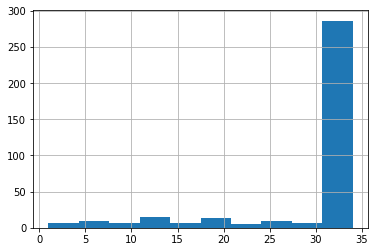

In [8]:
df_teams['YearsInD1'].hist()

For the teams that have less than 34 years in D1, it's mainly because it's joined D1 after 1985 (82 of the 90 teams).  The remainly 8 teams left D1 prior to 2018

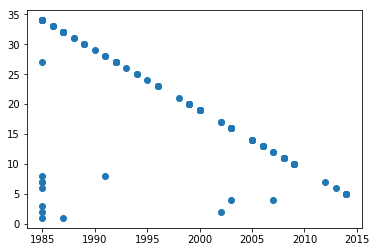

In [9]:
plt.scatter(df_teams.FirstD1Season, df_teams.YearsInD1)

In [10]:
len(df_teams[df_teams.YearsInD1<34])

90

In [11]:
len(df_teams[(df_teams.YearsInD1<34) & (df_teams.FirstD1Season>1985)])

82

In [12]:
df_teams[(df_teams.YearsInD1<34) & (df_teams.FirstD1Season==1985)].sort_values(by=['LastD1Season'])

,TeamID,TeamName,FirstD1Season,LastD1Season,YearsInD1,CurrentD1
226,1327,Okla City,1985,1985,1,False
345,1446,W Texas A&M,1985,1986,2,False
331,1432,Utica,1985,1987,3,False
114,1215,Hardin-Simmons,1985,1990,6,False
8,1109,Alliant Intl,1985,1991,7,False
20,1121,Augusta,1985,1991,7,False
33,1134,Brooklyn,1985,1992,8,False
46,1147,Centenary,1985,2011,27,False


In [13]:
len(df_teams[(df_teams.YearsInD1<34) & (df_teams.FirstD1Season==1985)].sort_values(by=['LastD1Season']))

8

Since majority of the teams have the same number of D1 years, this wouldn't be a very helpful feature

## Let's look at the impact of seed next

In [14]:
df_seeds.head()

,Season,Seed,TeamID
0,1985,W01,1207
1,1985,W02,1210
2,1985,W03,1228
3,1985,W04,1260
4,1985,W05,1374


In [15]:
df_tour.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
0,1985,136,1116,63,1234,54,N,0
1,1985,136,1120,59,1345,58,N,0
2,1985,136,1207,68,1250,43,N,0
3,1985,136,1229,58,1425,55,N,0
4,1985,136,1242,49,1325,38,N,0


First, we'll simplify the datasets to remove the columns we won't be using and convert the seedings to the needed format (stripping the regional abbreviation in front of the seed).

In [16]:
def seed_to_int(seed):
    #Get just the digits from the seeding. Return as int
    s_int = int(seed[1:3])
    return s_int
df_seeds['seed_int'] = df_seeds.Seed.apply(seed_to_int)
df_seeds.drop(labels=['Seed'], inplace=True, axis=1) # This is the string label
df_seeds.head()

,Season,TeamID,seed_int
0,1985,1207,1
1,1985,1210,2
2,1985,1228,3
3,1985,1260,4
4,1985,1374,5


Pivoting the seeds DF so I can use it as a lookup

In [17]:
df_seeds_pivot = df_seeds.pivot(index='TeamID', columns='Season', values='seed_int')

In [18]:
df_seeds_pivot.head()

Season,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
TeamID,,,,,,,,,,,,,,,,,,,,,
1102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1103,NaN,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,13.0,NaN,15.0,NaN,12.0,NaN,NaN,NaN,NaN,NaN
1104,7.0,5.0,2.0,NaN,6.0,7.0,4.0,5.0,NaN,9.0,...,NaN,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,9.0
1105,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1106,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,16.0,NaN,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
df_tour.drop(labels=['WScore', 'LScore', 'WLoc', 'NumOT'], inplace=True, axis=1)
df_tour.head()

,Season,DayNum,WTeamID,LTeamID
0,1985,136,1116,1234
1,1985,136,1120,1345
2,1985,136,1207,1250
3,1985,136,1229,1425
4,1985,136,1242,1325


Grabbing the winner and loser seeds as well as calculate the seed difference

In [20]:
WTeamSeeds = df_seeds_pivot.lookup(df_tour.WTeamID,df_tour.Season)
LTeamSeeds = df_seeds_pivot.lookup(df_tour.LTeamID,df_tour.Season)
TeamSeedDiffs = WTeamSeeds - LTeamSeeds
new_info_df = pd.DataFrame([WTeamSeeds,LTeamSeeds,TeamSeedDiffs]).transpose()
new_info_df.head()

,0,1,2
0,9.0,8.0,1.0
1,11.0,6.0,5.0
2,1.0,16.0,-15.0
3,9.0,8.0,1.0
4,3.0,14.0,-11.0


Attaching the new seed info to the tour DF

In [21]:
df_tour = pd.concat([df_tour, new_info_df], axis=1)
df_tour.columns = ['Season','DayNum','WTeamID','LTeamID','WTeamSeed','LTeamSeed','SeedDiff']
df_tour.head()

,Season,DayNum,WTeamID,LTeamID,WTeamSeed,LTeamSeed,SeedDiff
0,1985,136,1116,1234,9.0,8.0,1.0
1,1985,136,1120,1345,11.0,6.0,5.0
2,1985,136,1207,1250,1.0,16.0,-15.0
3,1985,136,1229,1425,9.0,8.0,1.0
4,1985,136,1242,1325,3.0,14.0,-11.0


Certainly it looks like the higher seed team win more often (More negative the seed difference is)

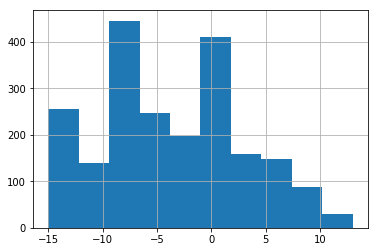

In [22]:
df_tour.SeedDiff.hist()

In fact, when there's a difference in seed, the higher seed team win 72% of the time

In [23]:
wins = len(df_tour[df_tour.SeedDiff<0])
losses = len(df_tour[df_tour.SeedDiff>0])
print "{0:.0f}%".format(1.*wins/(wins+losses)*100)

72%


Now I am breaking it down to see if seed difference impact varies as the tournament progresses.  Based on the scatter plot below, it looks relatively stable, but the seed difference definitely has a higher impact in the earlier rounds.  It dips to its lowest point on the first day of Elite 8 games.  On the first day of Elite 8 games, having a higher seed only gives you a 50% likihood of winning.

In [24]:
tour_days = [136, 137, 138, 139, 143, 144, 145, 146, 152, 154]
tour_days

[136, 137, 138, 139, 143, 144, 145, 146, 152, 154]

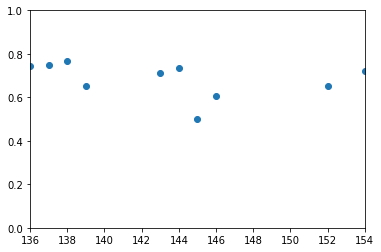

In [25]:
daynum_summary = pd.DataFrame(columns=['DayNum','WinPercentage'])

for day in tour_days:
    wins = len(df_tour[(df_tour.SeedDiff<0) & (df_tour.DayNum==day)])
    losses = len(df_tour[(df_tour.SeedDiff>0) & (df_tour.DayNum==day)])
    if wins+losses != 0:
        temp_df = pd.DataFrame([[day, 1.*wins/(wins+losses)]],columns=['DayNum','WinPercentage'])
        daynum_summary = daynum_summary.append(temp_df)

plt.axis((136,154,0,1))
plt.scatter(daynum_summary.DayNum,daynum_summary.WinPercentage)

In [26]:
daynum_summary

,DayNum,WinPercentage
0,136,0.746212
0,137,0.748106
0,138,0.765152
0,139,0.651515
0,143,0.712121
0,144,0.734848
0,145,0.500000
0,146,0.606061
0,152,0.653061
0,154,0.720000


Instead of just looking at whether or not a seed is higher, let's look at the actual difference between the seed.  In the chart below, it does look like the larger the seed difference, the win percentage does also go up.  There is an odd drop at seed diff = 10 though.  It's likely due to the low sample size (only 8 games with seed diff of 10).

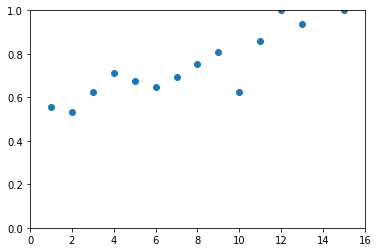

In [27]:
diff_summary = pd.DataFrame(columns=['SeedDiff','WinPercentage','GameCount'])

for diff in range(1,16):
    wins = len(df_tour[df_tour.SeedDiff==-diff])
    losses = len(df_tour[df_tour.SeedDiff==diff])
    if wins+losses != 0:
        temp_df = pd.DataFrame([[diff, 1.*wins/(wins+losses),wins+losses]],columns=['SeedDiff','WinPercentage','GameCount'])
        diff_summary = diff_summary.append(temp_df)

plt.axis((0,16,0,1))
plt.scatter(diff_summary.SeedDiff,diff_summary.WinPercentage)

In [28]:
diff_summary

,SeedDiff,WinPercentage,GameCount
0,1,0.553314,347
0,2,0.533333,45
0,3,0.622302,278
0,4,0.711712,111
0,5,0.676724,232
0,6,0.647059,17
0,7,0.694444,216
0,8,0.753304,227
0,9,0.810458,153
0,10,0.625000,8


Next I want to see if the seed difference has a difference impact as the tournament goes on.  The difference in seed does decrease as the tournament goes on though.

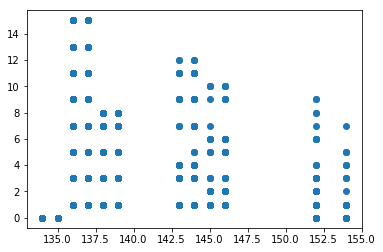

In [29]:
plt.scatter(df_tour.DayNum,abs(df_tour.SeedDiff))

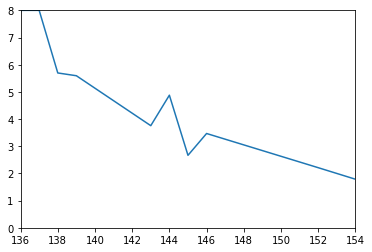

In [30]:
df_tour['AbsSeedDiff'] = abs(df_tour['SeedDiff'])
plt.axis((136,154,0,8))
plt.plot(df_tour.groupby(['DayNum'])['AbsSeedDiff'].mean())

Let's now see how different seed differences vary as the tournament goes on.

In [31]:
seeddiff_day_summary = pd.DataFrame(columns=['DayNum','SeedDiff','WinPercentage'])
for day in tour_days:
    for diff in range(1,16):
        wins = len(df_tour[(df_tour.SeedDiff==-diff) & (df_tour.DayNum==day)])
        losses = len(df_tour[(df_tour.SeedDiff==diff) & (df_tour.DayNum==day)])
        if wins+losses != 0:
            #temp_df = pd.DataFrame([[day, diff, "{0:.0f}%".format(1.*wins/(wins+losses)*100)]],columns=['DayNum','SeedDiff','WinPercentage'])
            temp_df = pd.DataFrame([[day, diff, 1.*wins/(wins+losses)]],columns=['DayNum','SeedDiff','WinPercentage'])
            seeddiff_day_summary = seeddiff_day_summary.append(temp_df)

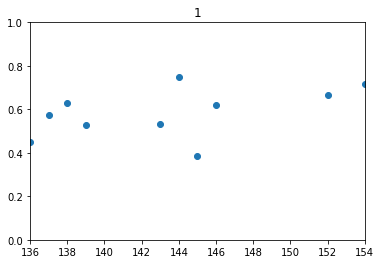

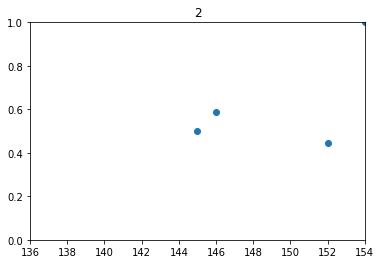

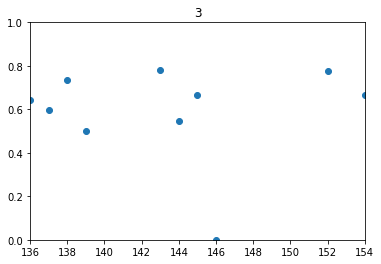

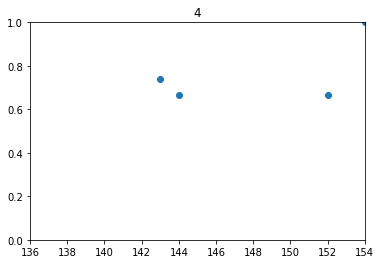

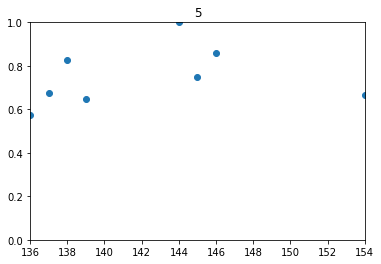

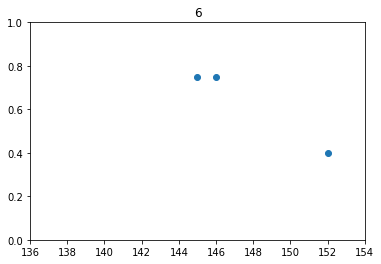

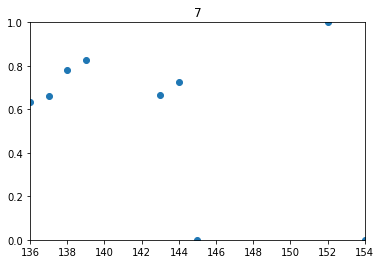

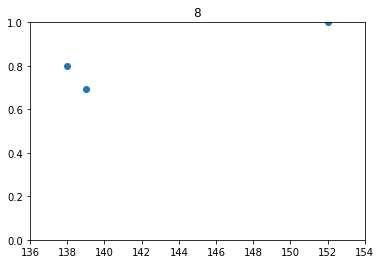

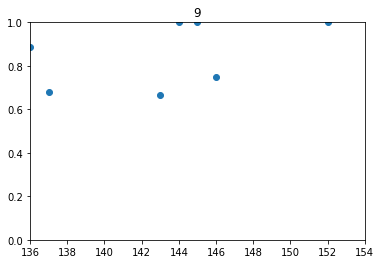

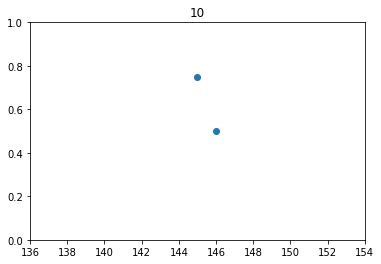

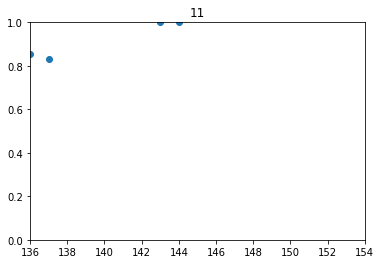

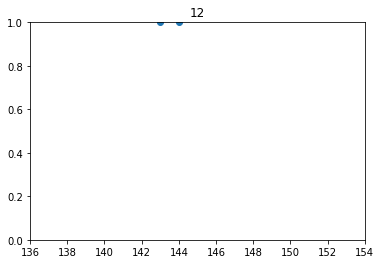

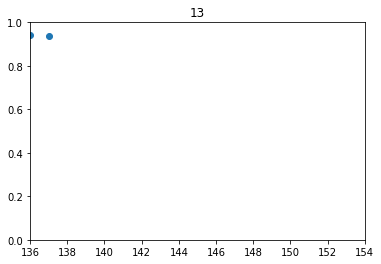

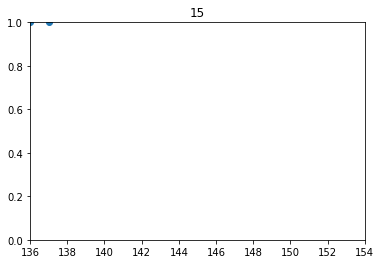

In [32]:
for diff in range(1,16):
    display_df = seeddiff_day_summary[seeddiff_day_summary.SeedDiff==diff]
    if len(display_df)!= 0:
        plt.figure(diff)  
        plt.title(diff)
        plt.axis((136,154,0,1))
        plt.scatter(display_df.DayNum,display_df.WinPercentage)

## Now let's look at number of historical tournament wins to get a sense of legacy

First we'll count the number of tour wins each season

In [35]:
df_tour_wins = df_tour.groupby(['WTeamID', 'Season']).count()
df_tour_wins.drop(labels=['LTeamID','WTeamSeed','LTeamSeed','SeedDiff','AbsSeedDiff'], inplace=True, axis=1)
df_tour_wins.reset_index(inplace=True)
df_tour_wins.columns = ['TeamID','Season','TourWins']
df_tour_wins.head()

,TeamID,Season,TourWins
0,1104,1985,2
1,1104,1986,2
2,1104,1987,2
3,1104,1990,2
4,1104,1991,2


Now calculating how many tour wins prior to the current season for WTeam and LTeam as well as calculating the diff

In [36]:
def tourWinsBefore(row):
    winnerWins = df_tour_wins[(df_tour_wins.TeamID==row.WTeamID)&(df_tour_wins.Season<row.Season)].TourWins.sum()
    loserWins = df_tour_wins[(df_tour_wins.TeamID==row.LTeamID)&(df_tour_wins.Season<row.Season)].TourWins.sum()
    return winnerWins, loserWins, winnerWins - loserWins

df_tour_wins_temp = pd.DataFrame()
df_tour_wins_temp = pd.DataFrame(df_tour.apply(tourWinsBefore, axis=1))[0].apply(pd.Series)
df_tour_wins_temp.columns = ['WTWins','LTWins','TourWinDiff']
df_tour_wins_temp.tail()

,WTWins,LTWins,TourWinDiff
2112,82,75,7
2113,0,42,-42
2114,24,0,24
2115,82,13,69
2116,82,24,58


Now attaching it to df_tour

In [37]:
df_tour = pd.concat([df_tour, df_tour_wins_temp], axis=1)
df_tour.head()

,Season,DayNum,WTeamID,LTeamID,WTeamSeed,LTeamSeed,SeedDiff,AbsSeedDiff,WTWins,LTWins,TourWinDiff
0,1985,136,1116,1234,9.0,8.0,1.0,1.0,0,0,0
1,1985,136,1120,1345,11.0,6.0,5.0,5.0,0,0,0
2,1985,136,1207,1250,1.0,16.0,-15.0,15.0,0,0,0
3,1985,136,1229,1425,9.0,8.0,1.0,1.0,0,0,0
4,1985,136,1242,1325,3.0,14.0,-11.0,11.0,0,0,0


Filling the NaN with 0

In [38]:
df_tour = df_tour.fillna(0)
df_tour.head()

,Season,DayNum,WTeamID,LTeamID,WTeamSeed,LTeamSeed,SeedDiff,AbsSeedDiff,WTWins,LTWins,TourWinDiff
0,1985,136,1116,1234,9.0,8.0,1.0,1.0,0,0,0
1,1985,136,1120,1345,11.0,6.0,5.0,5.0,0,0,0
2,1985,136,1207,1250,1.0,16.0,-15.0,15.0,0,0,0
3,1985,136,1229,1425,9.0,8.0,1.0,1.0,0,0,0
4,1985,136,1242,1325,3.0,14.0,-11.0,11.0,0,0,0


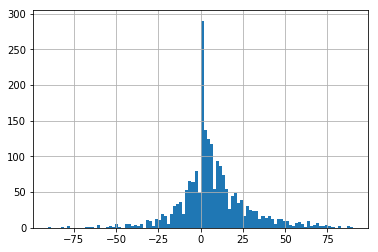

In [39]:
df_tour.TourWinDiff.hist(bins=100)

About 7% of tour games have tour win diff == 0 (excluded 1985 since everybody had 0 tour wins in that year)

In [40]:
print 1.0 * len(df_tour[(df_tour.TourWinDiff==0) & (df_tour.Season!=1985)])/len(df_tour[df_tour.Season!=1985])

0.0686465433301


About 56% of the non-1985 tournament games that have equal TourWinDiff are with teams with zero tournament wins.

In [76]:
len(df_tour[(df_tour.TourWinDiff==0) & (df_tour.Season!=1985)])

141

In [75]:
aggregations = {
    'Season': {
        'Game Count': 'count'
    }
}
df_tour[(df_tour.TourWinDiff==0) & (df_tour.Season!=1985)].groupby('WTWins').agg(aggregations)

/Users/elyliu/anaconda2/lib/python2.7/site-packages/pandas/core/groupby.py:4036: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


,Season
,Game Count
WTWins,
0,79
1,17
2,7
3,10
4,2
5,2
6,6
7,1


Teams with more historical tour wins have 70% of winning

In [41]:
wins = len(df_tour[df_tour.TourWinDiff>0])
losses = len(df_tour[df_tour.TourWinDiff<0])
print "{0:.0f}%".format(1.*wins/(wins+losses)*100)

70%


The bigger the difference in historical tournament wins, the bigger the chance the team with better legacy will win.  For example, if team A has 30 more historical tournament wins than their opponent, they will have 80.6% chance of winning.

In [42]:
def winPercentageByTourWinDiff(tWinDiff):
    wins = len(df_tour[df_tour.TourWinDiff>tWinDiff])
    losses = len(df_tour[df_tour.TourWinDiff<-tWinDiff])
    return 1.*wins/(wins+losses), wins+losses

tourwin_diff_summary = pd.DataFrame(columns=['TourWinDiff','WinPercentage','GameCount'])
win_diff_list = [0,5,10,15,20,25,30,35,40,45,50,55,60,70,75]
for d in win_diff_list:
    temp_df = pd.DataFrame([[d, winPercentageByTourWinDiff(d)[0], winPercentageByTourWinDiff(d)[1]]],columns=['TourWinDiff','WinPercentage','GameCount'])
    tourwin_diff_summary = tourwin_diff_summary.append(temp_df)
    
tourwin_diff_summary

,TourWinDiff,WinPercentage,GameCount
0,0,0.695243,1913
0,5,0.715743,1372
0,10,0.739669,968
0,15,0.756835,695
0,20,0.765714,525
0,25,0.791774,389
0,30,0.806122,294
0,35,0.812785,219
0,40,0.812865,171
0,45,0.834646,127


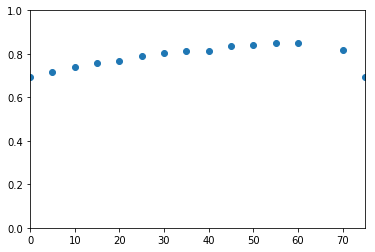

In [43]:
plt.axis((0,75,0,1))
plt.scatter(tourwin_diff_summary.TourWinDiff,tourwin_diff_summary.WinPercentage)

## Now looking at regular season score margin

In [44]:
df_reg.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
0,1985,20,1228,81,1328,64,N,0
1,1985,25,1106,77,1354,70,H,0
2,1985,25,1112,63,1223,56,H,0
3,1985,25,1165,70,1432,54,H,0
4,1985,25,1192,86,1447,74,H,0


Calculating the Score Diff for each regular season game

In [45]:
df_reg['ScoreDiff'] = df_reg['WScore'] - df_reg['LScore']
df_reg.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,ScoreDiff
0,1985,20,1228,81,1328,64,N,0,17
1,1985,25,1106,77,1354,70,H,0,7
2,1985,25,1112,63,1223,56,H,0,7
3,1985,25,1165,70,1432,54,H,0,16
4,1985,25,1192,86,1447,74,H,0,12


Making a row for the winner as well as the losers.  For the losers, the score diff will be negative.

In [46]:
df_reg_wins = pd.DataFrame()
df_reg_wins['ScoreDiff'] = df_reg['ScoreDiff']
df_reg_wins['TeamID'] = df_reg['WTeamID']
df_reg_wins['Season'] = df_reg['Season']
df_reg_wins['DayNum'] = df_reg['DayNum']

df_reg_losses = pd.DataFrame()
df_reg_losses['ScoreDiff'] = -df_reg['ScoreDiff']
df_reg_losses['TeamID'] = df_reg['LTeamID']
df_reg_losses['Season'] = df_reg['Season']
df_reg_losses['DayNum'] = df_reg['DayNum']

df_reg_scorediff = pd.concat((df_reg_wins, df_reg_losses))
df_reg_scorediff.head()

,ScoreDiff,TeamID,Season,DayNum
0,17,1228,1985,20
1,7,1106,1985,25
2,7,1112,1985,25
3,16,1165,1985,25
4,12,1192,1985,25


In [70]:
df_reg_scorediff.tail()

,ScoreDiff,TeamID,Season,DayNum
156084,-1,1222,2018,132
156085,-1,1348,2018,132
156086,-13,1426,2018,132
156087,-5,1397,2018,132
156088,-3,1217,2018,132


Now averaging all the score diffs in the regular season by team ID and season

In [47]:
df_avgScoreDiff = df_reg_scorediff.groupby(['Season','TeamID'], as_index=False).mean()
df_avgScoreDiff.drop(labels=['DayNum'], inplace=True, axis=1)
df_avgScoreDiff.head()

,Season,TeamID,ScoreDiff
0,1985,1102,-5.791667
1,1985,1103,-3.043478
2,1985,1104,7.800000
3,1985,1106,-3.791667
4,1985,1108,7.960000


Pivoting for lookup later

In [48]:
df_avgScoreDiff_pivot = df_avgScoreDiff.pivot(index='TeamID', columns='Season', values='ScoreDiff')
df_avgScoreDiff_pivot.head()

Season,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
TeamID,,,,,,,,,,,,,,,,,,,,,
1101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-15.476190,-10.857143,-6.407407,-4.760000,-2.148148
1102,-5.791667,-7.120000,-4.086957,-9.291667,-0.458333,-5.571429,-8.360000,-8.680000,-9.500000,-8.681818,...,-4.896552,-7.344828,-0.535714,-2.592593,0.500000,-5.785714,-1.137931,-6.166667,-4.064516,-6.034483
1103,-3.043478,4.240000,6.730769,9.680000,15.500000,0.692308,0.407407,-1.629630,-5.625000,-5.920000,...,5.911765,4.575758,3.647059,5.843750,9.677419,1.878788,4.117647,7.272727,5.484848,-4.903226
1104,7.800000,7.933333,10.766667,-2.666667,6.333333,9.968750,6.333333,6.727273,1.964286,4.571429,...,1.500000,3.718750,7.406250,6.812500,3.281250,-0.548387,2.129032,-0.968750,4.151515,2.382353
1105,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-8.083333,-6.478261,-3.440000,-8.538462,-8.586207,-3.285714,-7.428571,-2.642857,-15.896552,-15.935484


Creating a temp DF looking up the average score margin for both tournament teams and calculate the diff

In [53]:
WTeamRegAvgScoreDiff = df_avgScoreDiff_pivot.lookup(df_tour.WTeamID,df_tour.Season)
LTeamRegAvgScoreDiff = df_avgScoreDiff_pivot.lookup(df_tour.LTeamID,df_tour.Season)
TeamRegAvgScoreDiffDiff = WTeamRegAvgScoreDiff - LTeamRegAvgScoreDiff
new_info_df = pd.DataFrame([WTeamRegAvgScoreDiff,LTeamRegAvgScoreDiff,TeamRegAvgScoreDiffDiff]).transpose()
new_info_df.head()

,0,1,2
0,3.636364,10.466667,-6.830303
1,3.689655,3.800000,-0.110345
2,15.666667,-4.448276,20.114943
3,5.962963,3.785714,2.177249
4,5.633333,4.555556,1.077778


Attaching the data to df_tour

In [54]:
df_tour = pd.concat([df_tour, new_info_df], axis=1)
df_tour.head()

,Season,DayNum,WTeamID,LTeamID,WTeamSeed,LTeamSeed,SeedDiff,AbsSeedDiff,WTWins,LTWins,TourWinDiff,0,1,2
0,1985,136,1116,1234,9.0,8.0,1.0,1.0,0,0,0,3.636364,10.466667,-6.830303
1,1985,136,1120,1345,11.0,6.0,5.0,5.0,0,0,0,3.689655,3.800000,-0.110345
2,1985,136,1207,1250,1.0,16.0,-15.0,15.0,0,0,0,15.666667,-4.448276,20.114943
3,1985,136,1229,1425,9.0,8.0,1.0,1.0,0,0,0,5.962963,3.785714,2.177249
4,1985,136,1242,1325,3.0,14.0,-11.0,11.0,0,0,0,5.633333,4.555556,1.077778


In [55]:
df_tour.columns = ['Season','DayNum','WTeamID','LTeamID','WTeamSeed','LTeamSeed','SeedDiff','AbsSeedDiff','WTWins','LTWins','TourWinDiff','WRScoreDiff','LRScoreDiff','RScoreDiffDiff']
df_tour.head()

,Season,DayNum,WTeamID,LTeamID,WTeamSeed,LTeamSeed,SeedDiff,AbsSeedDiff,WTWins,LTWins,TourWinDiff,WRScoreDiff,LRScoreDiff,RScoreDiffDiff
0,1985,136,1116,1234,9.0,8.0,1.0,1.0,0,0,0,3.636364,10.466667,-6.830303
1,1985,136,1120,1345,11.0,6.0,5.0,5.0,0,0,0,3.689655,3.800000,-0.110345
2,1985,136,1207,1250,1.0,16.0,-15.0,15.0,0,0,0,15.666667,-4.448276,20.114943
3,1985,136,1229,1425,9.0,8.0,1.0,1.0,0,0,0,5.962963,3.785714,2.177249
4,1985,136,1242,1325,3.0,14.0,-11.0,11.0,0,0,0,5.633333,4.555556,1.077778


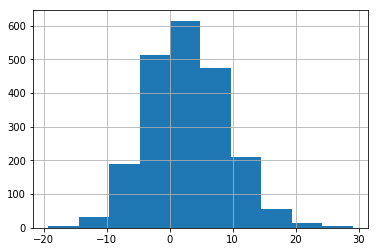

In [56]:
df_tour.RScoreDiffDiff.hist()

Teams with higher regular season score margin will win 66% of the tournament games

In [57]:
wins = len(df_tour[df_tour.RScoreDiffDiff>0])
losses = len(df_tour[df_tour.RScoreDiffDiff<0])
print "{0:.0f}%".format(1.*wins/(wins+losses)*100)

66%


Bucketing the score margin diff, look like if the larger the score margin diff between the teams, the more likely the team with higher score margin will win.  For example, if Team A have a regular season score margin of 15 and Team B have 5, team A will have 89% chance of winning (15-5 = 10 ScoreMarginDiff)

In [66]:
def winPercentageByRegScoreDiffDiff(diff):
    wins = len(df_tour[df_tour.RScoreDiffDiff>diff])
    losses = len(df_tour[df_tour.RScoreDiffDiff<-diff])
    return 1.*wins/(wins+losses), wins+losses

regscorediff_diff_summary = pd.DataFrame(columns=['RegScoreDiffDiff','WinPercentage','GameCount'])
rscorediff_diff_list = [0,1,2,3,4,5,6,7,8,9,10,15,20]
for d in rscorediff_diff_list:
    temp_df = pd.DataFrame([[d, winPercentageByRegScoreDiffDiff(d)[0], winPercentageByRegScoreDiffDiff(d)[1]]],columns=['RegScoreDiffDiff','WinPercentage','GameCount'])
    regscorediff_diff_summary = regscorediff_diff_summary.append(temp_df)
    
regscorediff_diff_summary

,RegScoreDiffDiff,WinPercentage,GameCount
0,0,0.658479,2117
0,1,0.685074,1829
0,2,0.705392,1558
0,3,0.739777,1345
0,4,0.757682,1139
0,5,0.779979,959
0,6,0.807742,775
0,7,0.841060,604
0,8,0.856250,480
0,9,0.878049,369


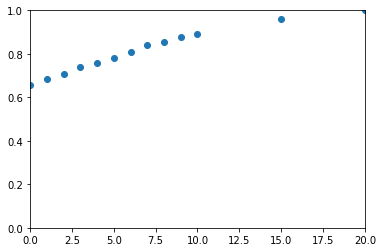

In [67]:
plt.axis((0,20,0,1))
plt.scatter(regscorediff_diff_summary.RegScoreDiffDiff,regscorediff_diff_summary.WinPercentage)

## Looking to see if momentum into the tournament has a difference.  Doing the same thing as above (Score Margin) but looking just at the last 5 games before the tournament.

First grabbing the last 5 games for each team/season

In [50]:
last5games = df_reg_scorediff.sort_values(['Season','TeamID','DayNum']).groupby(['Season','TeamID']).tail(5)
last5games.head(15)

,ScoreDiff,TeamID,Season,DayNum
3157,4,1102,1985,117
3321,-2,1102,1985,120
3404,-1,1102,1985,122
3563,3,1102,1985,126
3606,-2,1102,1985,127
2780,-2,1103,1985,107
2875,3,1103,1985,110
3001,14,1103,1985,112
3254,-22,1103,1985,117
3306,-8,1103,1985,119


Averaging the score margin

In [51]:
df_last5AvgScoreDiff = last5games.groupby(['Season','TeamID'], as_index=False).mean()
df_last5AvgScoreDiff.drop(labels=['DayNum'], inplace=True, axis=1)
df_last5AvgScoreDiff.head()

,Season,TeamID,ScoreDiff
0,1985,1102,0.4
1,1985,1103,-3.0
2,1985,1104,11.0
3,1985,1106,-1.0
4,1985,1108,2.4


Pivoting for lookup later

In [52]:
df_last5AvgScoreDiff_pivot = df_last5AvgScoreDiff.pivot(index='TeamID', columns='Season', values='ScoreDiff')
df_last5AvgScoreDiff_pivot.head()

Season,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
TeamID,,,,,,,,,,,,,,,,,,,,,
1101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-8.0,-14.8,-0.2,-5.6,-7.0
1102,0.4,-3.0,-13.6,-15.6,-5.2,2.6,-7.6,-17.8,-14.6,-7.8,...,-3.6,-9.0,-0.2,-13.6,-6.2,-10.2,-3.2,-6.0,-16.6,1.4
1103,-3.0,5.0,5.2,10.0,34.0,-8.0,-7.4,-8.2,-6.0,-11.6,...,5.4,-0.6,4.4,-3.8,3.6,5.6,5.6,8.4,4.4,-4.0
1104,11.0,4.4,11.4,-9.4,12.0,14.8,9.0,-4.0,2.2,11.8,...,0.6,3.4,-6.4,3.4,-2.6,2.0,-2.8,-3.6,7.2,-5.4
1105,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-3.2,-9.2,-7.0,-2.8,3.0,4.4,-4.6,-4.8,-8.2,-12.2


In [58]:
WTeamLast5AvgScoreDiff = df_last5AvgScoreDiff_pivot.lookup(df_tour.WTeamID,df_tour.Season)
LTeamLast5AvgScoreDiff = df_last5AvgScoreDiff_pivot.lookup(df_tour.LTeamID,df_tour.Season)
TeamLast5AvgScoreDiffDiff = WTeamLast5AvgScoreDiff - LTeamLast5AvgScoreDiff
new_info_df = pd.DataFrame([WTeamLast5AvgScoreDiff,LTeamLast5AvgScoreDiff,TeamLast5AvgScoreDiffDiff]).transpose()
new_info_df.head()

,0,1,2
0,12.4,-1.4,13.8
1,8.4,-6.8,15.2
2,19.0,-1.6,20.6
3,7.4,5.0,2.4
4,1.8,7.6,-5.8


Attaching the new data to df_tour

In [59]:
df_tour = pd.concat([df_tour, new_info_df], axis=1)
df_tour.head()

,Season,DayNum,WTeamID,LTeamID,WTeamSeed,LTeamSeed,SeedDiff,AbsSeedDiff,WTWins,LTWins,TourWinDiff,WRScoreDiff,LRScoreDiff,RScoreDiffDiff,0,1,2
0,1985,136,1116,1234,9.0,8.0,1.0,1.0,0,0,0,3.636364,10.466667,-6.830303,12.4,-1.4,13.8
1,1985,136,1120,1345,11.0,6.0,5.0,5.0,0,0,0,3.689655,3.800000,-0.110345,8.4,-6.8,15.2
2,1985,136,1207,1250,1.0,16.0,-15.0,15.0,0,0,0,15.666667,-4.448276,20.114943,19.0,-1.6,20.6
3,1985,136,1229,1425,9.0,8.0,1.0,1.0,0,0,0,5.962963,3.785714,2.177249,7.4,5.0,2.4
4,1985,136,1242,1325,3.0,14.0,-11.0,11.0,0,0,0,5.633333,4.555556,1.077778,1.8,7.6,-5.8


In [60]:
df_tour.columns = ['Season','DayNum','WTeamID','LTeamID','WTeamSeed','LTeamSeed','SeedDiff','AbsSeedDiff','WTWins','LTWins','TourWinDiff','WRScoreDiff','LRScoreDiff','RScoreDiffDiff','WL5ScoreDiff','LL5ScoreDiff','L5ScoreDiffDiff']
df_tour.head()

,Season,DayNum,WTeamID,LTeamID,WTeamSeed,LTeamSeed,SeedDiff,AbsSeedDiff,WTWins,LTWins,TourWinDiff,WRScoreDiff,LRScoreDiff,RScoreDiffDiff,WL5ScoreDiff,LL5ScoreDiff,L5ScoreDiffDiff
0,1985,136,1116,1234,9.0,8.0,1.0,1.0,0,0,0,3.636364,10.466667,-6.830303,12.4,-1.4,13.8
1,1985,136,1120,1345,11.0,6.0,5.0,5.0,0,0,0,3.689655,3.800000,-0.110345,8.4,-6.8,15.2
2,1985,136,1207,1250,1.0,16.0,-15.0,15.0,0,0,0,15.666667,-4.448276,20.114943,19.0,-1.6,20.6
3,1985,136,1229,1425,9.0,8.0,1.0,1.0,0,0,0,5.962963,3.785714,2.177249,7.4,5.0,2.4
4,1985,136,1242,1325,3.0,14.0,-11.0,11.0,0,0,0,5.633333,4.555556,1.077778,1.8,7.6,-5.8


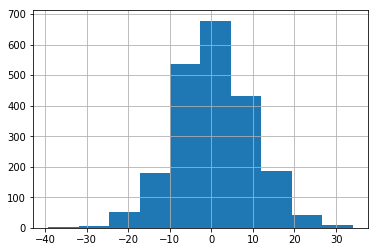

In [61]:
df_tour.L5ScoreDiffDiff.hist()

Teams with better last 5 regular season game score margin only has 52% chance of winning the tournament games

In [62]:
wins = len(df_tour[df_tour.L5ScoreDiffDiff>0])
losses = len(df_tour[df_tour.L5ScoreDiffDiff<0])
print "{0:.0f}%".format(1.*wins/(wins+losses)*100)

52%


The predictability does not improve with different score margin buckets.

In [68]:
def winPercentageByL5ScoreDiffDiff(diff):
    wins = len(df_tour[df_tour.L5ScoreDiffDiff>diff])
    losses = len(df_tour[df_tour.L5ScoreDiffDiff<-diff])
    return 1.*wins/(wins+losses), wins+losses

l5scorediff_diff_summary = pd.DataFrame(columns=['L5ScoreDiffDiff','WinPercentage','GameCount'])
l5scorediff_diff_list = [0,1,2,3,4,5,6,7,8,9,10,15,20]
for d in l5scorediff_diff_list:
    temp_df = pd.DataFrame([[d, winPercentageByL5ScoreDiffDiff(d)[0], winPercentageByL5ScoreDiffDiff(d)[1]]],columns=['L5ScoreDiffDiff','WinPercentage','GameCount'])
    l5scorediff_diff_summary = l5scorediff_diff_summary.append(temp_df)
    
l5scorediff_diff_summary

,L5ScoreDiffDiff,WinPercentage,GameCount
0,0,0.522445,2094
0,1,0.524974,1922
0,2,0.519885,1735
0,3,0.522918,1549
0,4,0.519189,1381
0,5,0.520782,1227
0,6,0.527831,1042
0,7,0.534155,893
0,8,0.541131,778
0,9,0.551181,635


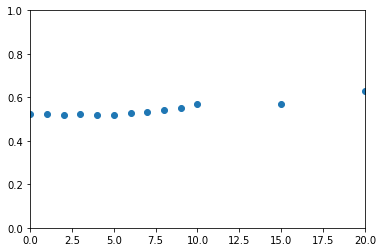

In [69]:
plt.axis((0,20,0,1))
plt.scatter(l5scorediff_diff_summary.L5ScoreDiffDiff,l5scorediff_diff_summary.WinPercentage)

## See if there's a difference if I looked at score margin as a percentage rather than actuals

In [77]:
df_reg['ScoreDiffPerc'] = df_reg['WScore']/df_reg['LScore']-1
df_reg.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,ScoreDiff,ScoreDiffPerc
0,1985,20,1228,81,1328,64,N,0,17,0.265625
1,1985,25,1106,77,1354,70,H,0,7,0.100000
2,1985,25,1112,63,1223,56,H,0,7,0.125000
3,1985,25,1165,70,1432,54,H,0,16,0.296296
4,1985,25,1192,86,1447,74,H,0,12,0.162162


In [79]:
df_reg_wins_p = pd.DataFrame()
df_reg_wins_p['ScoreDiffPerc'] = df_reg['ScoreDiffPerc']
df_reg_wins_p['TeamID'] = df_reg['WTeamID']
df_reg_wins_p['Season'] = df_reg['Season']
df_reg_wins_p['DayNum'] = df_reg['DayNum']

df_reg_losses_p = pd.DataFrame()
df_reg_losses_p['ScoreDiffPerc'] = -df_reg['ScoreDiffPerc']
df_reg_losses_p['TeamID'] = df_reg['LTeamID']
df_reg_losses_p['Season'] = df_reg['Season']
df_reg_losses_p['DayNum'] = df_reg['DayNum']

df_reg_scorediff_p = pd.concat((df_reg_wins_p, df_reg_losses_p))
df_reg_scorediff_p.head()

,ScoreDiffPerc,TeamID,Season,DayNum
0,0.265625,1228,1985,20
1,0.100000,1106,1985,25
2,0.125000,1112,1985,25
3,0.296296,1165,1985,25
4,0.162162,1192,1985,25


In [80]:
df_avgScoreDiff_p = df_reg_scorediff_p.groupby(['Season','TeamID'], as_index=False).mean()
df_avgScoreDiff_p.drop(labels=['DayNum'], inplace=True, axis=1)
df_avgScoreDiff_p.head()

,Season,TeamID,ScoreDiffPerc
0,1985,1102,-0.102958
1,1985,1103,-0.063462
2,1985,1104,0.140817
3,1985,1106,-0.059113
4,1985,1108,0.111157


In [82]:
df_avgScoreDiff_p_pivot = df_avgScoreDiff_p.pivot(index='TeamID', columns='Season', values='ScoreDiffPerc')
df_avgScoreDiff_p_pivot.head()

Season,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
TeamID,,,,,,,,,,,,,,,,,,,,,
1101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-0.296051,-0.251722,-0.108616,-0.085326,-0.040396
1102,-0.102958,-0.140175,-0.062973,-0.167876,-0.006894,-0.111087,-0.162199,-0.164393,-0.171793,-0.139876,...,-0.103994,-0.150016,-0.010636,-0.044935,0.008115,-0.101538,-0.009755,-0.103582,-0.069273,-0.113616
1103,-0.063462,0.074269,0.106988,0.166220,0.258965,0.015399,-0.003280,-0.029929,-0.103452,-0.101903,...,0.126036,0.081254,0.064153,0.101285,0.177751,0.028716,0.080765,0.120597,0.090950,-0.078394
1104,0.140817,0.129782,0.169739,-0.049299,0.100825,0.203545,0.111763,0.104819,0.019881,0.083241,...,0.036803,0.076897,0.161688,0.138769,0.074259,-0.006913,0.048883,-0.022426,0.079028,0.037499
1105,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.160226,-0.145242,-0.063000,-0.155530,-0.162033,-0.065640,-0.154683,-0.044777,-0.293523,-0.276890


In [83]:
WTeamRegAvgScoreDiffP = df_avgScoreDiff_p_pivot.lookup(df_tour.WTeamID,df_tour.Season)
LTeamRegAvgScoreDiffP = df_avgScoreDiff_p_pivot.lookup(df_tour.LTeamID,df_tour.Season)
TeamRegAvgScoreDiffDiffP = WTeamRegAvgScoreDiffP - LTeamRegAvgScoreDiffP
new_info_df = pd.DataFrame([WTeamRegAvgScoreDiffP,LTeamRegAvgScoreDiffP,TeamRegAvgScoreDiffDiffP]).transpose()
new_info_df.head()

,0,1,2
0,0.058613,0.204159,-0.145546
1,0.069763,0.076693,-0.006930
2,0.282624,-0.085308,0.367931
3,0.103817,0.059203,0.044614
4,0.087893,0.085103,0.002790


In [84]:
df_tour = pd.concat([df_tour, new_info_df], axis=1)
df_tour.head()

,Season,DayNum,WTeamID,LTeamID,WTeamSeed,LTeamSeed,SeedDiff,AbsSeedDiff,WTWins,LTWins,TourWinDiff,WRScoreDiff,LRScoreDiff,RScoreDiffDiff,WL5ScoreDiff,LL5ScoreDiff,L5ScoreDiffDiff,0,1,2
0,1985,136,1116,1234,9.0,8.0,1.0,1.0,0,0,0,3.636364,10.466667,-6.830303,12.4,-1.4,13.8,0.058613,0.204159,-0.145546
1,1985,136,1120,1345,11.0,6.0,5.0,5.0,0,0,0,3.689655,3.800000,-0.110345,8.4,-6.8,15.2,0.069763,0.076693,-0.006930
2,1985,136,1207,1250,1.0,16.0,-15.0,15.0,0,0,0,15.666667,-4.448276,20.114943,19.0,-1.6,20.6,0.282624,-0.085308,0.367931
3,1985,136,1229,1425,9.0,8.0,1.0,1.0,0,0,0,5.962963,3.785714,2.177249,7.4,5.0,2.4,0.103817,0.059203,0.044614
4,1985,136,1242,1325,3.0,14.0,-11.0,11.0,0,0,0,5.633333,4.555556,1.077778,1.8,7.6,-5.8,0.087893,0.085103,0.002790


In [85]:
df_tour.columns = ['Season','DayNum','WTeamID','LTeamID','WTeamSeed','LTeamSeed','SeedDiff','AbsSeedDiff','WTWins','LTWins','TourWinDiff','WRScoreDiff','LRScoreDiff','RScoreDiffDiff','WL5ScoreDiff','LL5ScoreDiff','L5ScoreDiffDiff','WRScoreDiffP','LRScoreDiffP','RScoreDiffDiffP']
df_tour.head()

,Season,DayNum,WTeamID,LTeamID,WTeamSeed,LTeamSeed,SeedDiff,AbsSeedDiff,WTWins,LTWins,TourWinDiff,WRScoreDiff,LRScoreDiff,RScoreDiffDiff,WL5ScoreDiff,LL5ScoreDiff,L5ScoreDiffDiff,WRScoreDiffP,LRScoreDiffP,RScoreDiffDiffP
0,1985,136,1116,1234,9.0,8.0,1.0,1.0,0,0,0,3.636364,10.466667,-6.830303,12.4,-1.4,13.8,0.058613,0.204159,-0.145546
1,1985,136,1120,1345,11.0,6.0,5.0,5.0,0,0,0,3.689655,3.800000,-0.110345,8.4,-6.8,15.2,0.069763,0.076693,-0.006930
2,1985,136,1207,1250,1.0,16.0,-15.0,15.0,0,0,0,15.666667,-4.448276,20.114943,19.0,-1.6,20.6,0.282624,-0.085308,0.367931
3,1985,136,1229,1425,9.0,8.0,1.0,1.0,0,0,0,5.962963,3.785714,2.177249,7.4,5.0,2.4,0.103817,0.059203,0.044614
4,1985,136,1242,1325,3.0,14.0,-11.0,11.0,0,0,0,5.633333,4.555556,1.077778,1.8,7.6,-5.8,0.087893,0.085103,0.002790


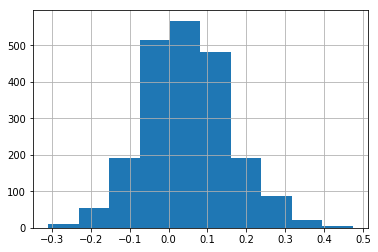

In [86]:
df_tour.RScoreDiffDiffP.hist()

In [87]:
wins = len(df_tour[df_tour.RScoreDiffDiffP>0])
losses = len(df_tour[df_tour.RScoreDiffDiffP<0])
print "{0:.0f}%".format(1.*wins/(wins+losses)*100)

65%


In [95]:
def winPercentageByRegScoreDiffDiffP(diff):
    wins = len(df_tour[df_tour.RScoreDiffDiffP>diff])
    losses = len(df_tour[df_tour.RScoreDiffDiffP<-diff])
    return 1.*wins/(wins+losses), wins+losses

regscorediff_diff_p_summary = pd.DataFrame(columns=['RegScoreDiffDiffP','WinPercentage','GameCount'])
rscorediff_diff_p_list = [0,0.02,0.04,0.06,0.08,0.10,0.12,0.14,0.16,0.18,0.2,0.25,0.3,0.4]
for d in rscorediff_diff_p_list:
    temp_df = pd.DataFrame([[d, winPercentageByRegScoreDiffDiffP(d)[0], winPercentageByRegScoreDiffDiffP(d)[1]]],columns=['RegScoreDiffDiffP','WinPercentage','GameCount'])
    regscorediff_diff_p_summary = regscorediff_diff_p_summary.append(temp_df)
    
regscorediff_diff_p_summary

,RegScoreDiffDiffP,WinPercentage,GameCount
0,0,0.651393,2117
0,0.02,0.676080,1806
0,0.04,0.699934,1523
0,0.06,0.747218,1258
0,0.08,0.776278,1037
0,0.1,0.785372,834
0,0.12,0.808937,649
0,0.14,0.830266,489
0,0.16,0.844444,360
0,0.18,0.869718,284


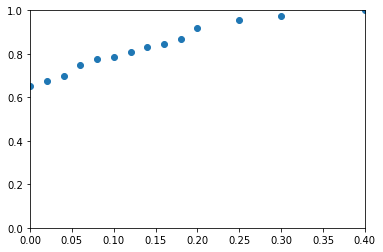

In [96]:
plt.axis((0,0.4,0,1))
plt.scatter(regscorediff_diff_p_summary.RegScoreDiffDiffP,regscorediff_diff_p_summary.WinPercentage)